In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
import matplotlib.gridspec as gridspec
from scipy.signal import find_peaks

In [2]:
# loading ITPC spectrums from various subjects in different ROIs
ITPCs = np.load("/home/jeremy/Desktop/asymmetric-sampling-master/data/figS2/peaks_sample.npy")

In [3]:
colors = list(np.tile( ('darkkhaki', 'darkkhaki', 'darkkhaki', 'royalblue', 'royalblue','royalblue') ,3))
freqs = np.logspace(*np.log10([2, 250]), num = 200)

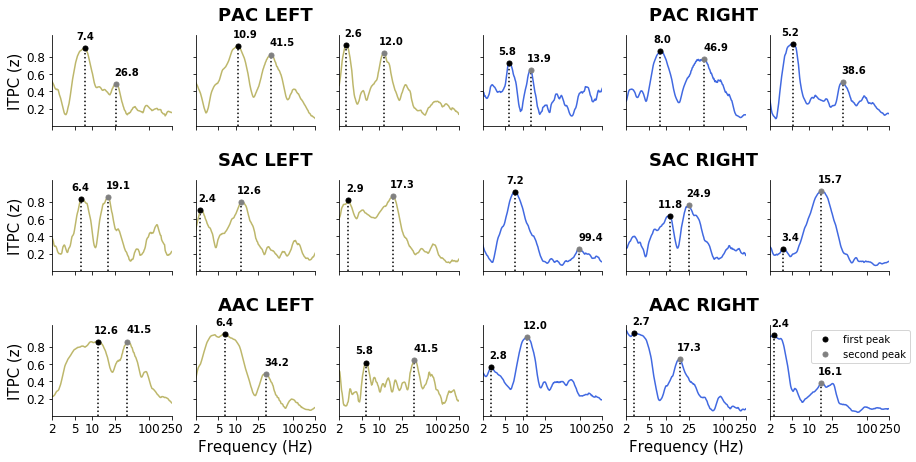

In [4]:
figS2,axs = plt.subplots(3,6,figsize = (15,7))

deads = [1,2,4,5,7,8,10,11]
last = [9,10,11]
first = [0,3,6,9]

peaks_one_left = []
peaks_two_left = []


titles = ['PAC LEFT','PAC RIGHT','SAC LEFT', 'SAC RIGHT', 'AAC LEFT', 'AAC RIGHT']

count = -1
for i,(ax,area,col) in  enumerate(zip(axs.ravel(),ITPCs,colors)):
    ax.plot(freqs,area,color = col)
    b = find_peaks(area,prominence = 0.01, distance = 20)           
    peaks_freq_ind = b[0]
    peaks_vals = np.take(area,peaks_freq_ind)
    fin_peaks_vals = peaks_vals[np.argsort(peaks_vals)[-2:]]
    new_freqs_ind = [np.where(area == fin_peaks_vals[0])[0][0],np.where(area == fin_peaks_vals[1])[0][0]]
    new_freqs = np.take(freqs,new_freqs_ind)
    good = np.sort(new_freqs)    
    if good[0] != new_freqs[0]:
        fin_peaks_vals = fin_peaks_vals[::-1]
    peaks_one_left.append(good[0])
    peaks_two_left.append(good[1])
    chosen = ['k','grey']
    lab = ['first peak', 'second peak']
    for numb,pic in enumerate(fin_peaks_vals):
        ax.plot(good[numb],pic,'o',color = chosen[numb],label = lab[numb],markersize=5)
    for j in new_freqs_ind:
        ax.vlines(freqs[j], -.05, np.take(area,j), linestyle = ':')
        if j ==  73:
            ax.text(freqs[j]-4.5, np.take(area,j) + 0.1, str(np.round(freqs[j],1)), weight = 'bold')
        elif j > 22:
            ax.text(freqs[j]-2, np.take(area,j) + 0.1, str(np.round(freqs[j],1)), weight = 'bold')
        elif j <= 22:
            ax.text(freqs[j]-0.2,np.take(area,j) + 0.1, str(np.round(freqs[j],1)), weight = 'bold')
  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xscale("log")
    ax.set_xlim(2,250)
    ax.set_ylim(0,1.05)
    ax.set_yticks(np.round(np.linspace(0, 0.8,5), 2))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
    ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    ax.xaxis.set_minor_locator(ticker.NullLocator())
    tick_vals = np.array([2,5,10,25,100,250]).astype(int)
    ax.set_xticks(tick_vals)
    tick_vals = np.array([0.2,0.4,0.6,0.8])
    ax.set_yticks(tick_vals)
    if i < 12  :
        ax.set_xticklabels([])
    if i not in [0,6,12] :
        ax.set_yticklabels([])
    if i in [13, 16]:
        ax.set_xlabel('Frequency (Hz)', fontsize = 15 )
    if i in [1,4,7,10,13,16]:
        count += 1
        ax.text(5,1.22,titles[count], fontsize = 18,weight = 'bold')
    if i in [0,6,12]:
        ax.set_ylabel('ITPC (z)',rotation = 90, fontsize = 15 );
    if i == 17:
        plt.legend(loc = 'best', bbox_to_anchor = (0.3, 0.5, 0.5, 0.5))
plt.subplots_adjust(hspace = 0.6)